In [5]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import time
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.utils import shuffle

Initialize the data points and Random centers
===========================


In [6]:
cluster=2

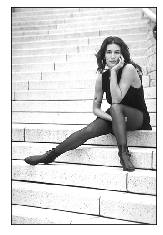

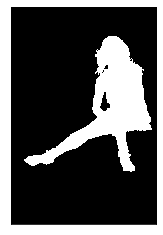

In [11]:
import cv2 

img = cv2.imread('181021.jpg',0)
e = cv2.imread('181021.png',0)

ret,e = cv2.threshold(e,100,255,cv2.THRESH_BINARY)


height, width = img.shape[0],img.shape[1]
img_list = np.reshape(img, (height*width, 1))

plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap='gray')
plt.show()

plt.xticks([])
plt.yticks([])
plt.imshow(e, cmap='gray')
plt.show()


x=img_list
# x=img

KMeans - Clustering
===============

In [4]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=cluster, random_state=5).fit(x)
kmeans.labels_

kmeans.cluster_centers_
vv=kmeans.cluster_centers_


ny=kmeans.labels_ #np.argmax(uu,axis=1)

# for i in range ( cluster):
#     plt.scatter(x[ny == i, 0], x[ny == i, 1],  s=10, label="Cluster - "+str(i))
# plt.scatter(x=np.asarray(vv)[:,0],y=np.asarray(vv)[:,1], color='black',s=50)
# plt.show()



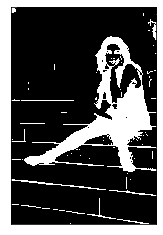

In [5]:
index = np.copy(ny)
index = np.reshape(index, (height, width))
plt.xticks([])
plt.yticks([])
# axes = plt.gca()
plt.imshow(index, cmap='gray')
plt.show(block=True) 

In [6]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print(normalized_mutual_info_score(e.flatten(),ny))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(e.flatten(),ny))

from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(e.flatten(),ny))

0.45417627210936773
11049.714205218877
0.6446851116721495


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [7]:

import pandas as pd
test=pd.DataFrame()
test['y']=e.flatten()
test['ny']=ny

import itertools 
perm = itertools.permutations(np.unique(test.y)) 
_totalperm=[]
  
for i in list(perm): 
    _totalperm.append(list(i)) 
    

from sklearn import metrics as m
normalized_mutual_info_score1=[]
mean_squared_error1=[]
adjusted_rand_score1=[]
newols=[]
values=[]

for i in range(len(_totalperm)): 
    print(i)
    newcolvals=np.zeros((test.shape[0]))
    for j in range(test.shape[0]):
        newcolvals[j]=(_totalperm[i])[test.ny[j]] 
        
    newols.append(newcolvals)
    normalized_mutual_info_score1.append(normalized_mutual_info_score(e.flatten(),newcolvals))
    mean_squared_error1.append(mean_squared_error(e.flatten(),newcolvals))
    adjusted_rand_score1.append(adjusted_rand_score(e.flatten(),newcolvals))

    
print(np.min(mean_squared_error1))

mean_squared_error1

0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


1
5097.10154079313


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


[5097.10154079313, 59927.898459206874]